# **EDA 탐색적 데이터 분석**


- Exploratory Data Anaysis
- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악
- 목적
    - 데이터 수집 의사 결정
    - 데이터 맞는 모델 선정
    - 변수들 간 관계 파악
- 순서
    - 데이터 가져오기(모듈 세팅)
    - 데이터 정보 확인
    - 데이터 전처리(결측치, 이상치)
    - 데이터 시각화

# **ㅡㅡㅡㅡㅡoutlier.xlsx 파일ㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [1]:
import pandas as pd

In [22]:
out_df = pd.read_excel('outlier.xlsx')

## **2. 데이터 정보 확인**

In [5]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [6]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [7]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [8]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [9]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [24]:
out_df = out_df.set_index('번호')
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


## **3. 데이터 전처리 - 이상치**

- 이상치(outlier): 사분위에서 특정범위(+- IQR*1.5)를 초과하는 경우

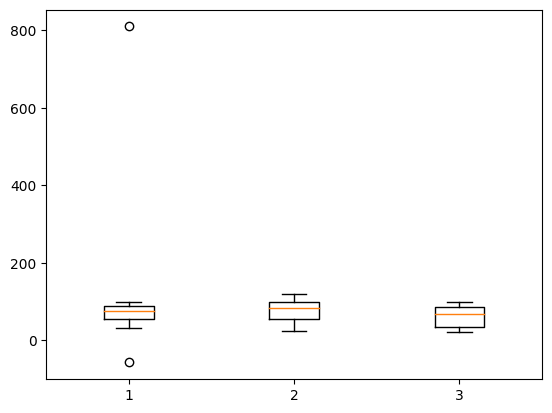

In [25]:
import matplotlib.pyplot as plt

# 이상치 확인 -> boxplot
plt.boxplot(out_df)
plt.show()

In [27]:
out_df['국어'] = out_df['국어'].replace(-57, 57)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [26]:
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


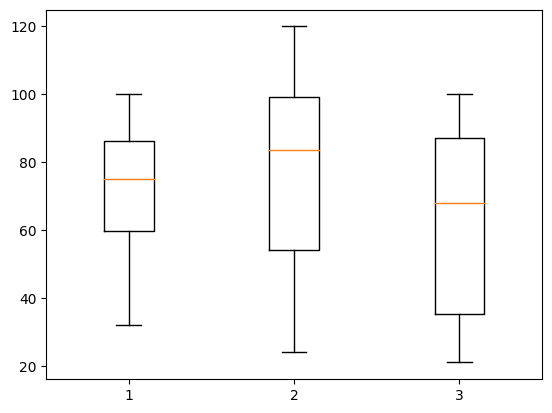

In [28]:
plt.boxplot(out_df)
plt.show()

## **4. 데이터 시각화**

In [ ]:
# 1반 학생들의 국어(수학/영어) 성적 평균
# 과목별로 최대 최소값
# 순서대로 -> 사분위값 -> 상위 몇 %

In [158]:
out_df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,71.600000,77.300000,62.00000
std,20.646226,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,86.250000,99.250000,87.00000
max,100.000000,120.000000,100.00000


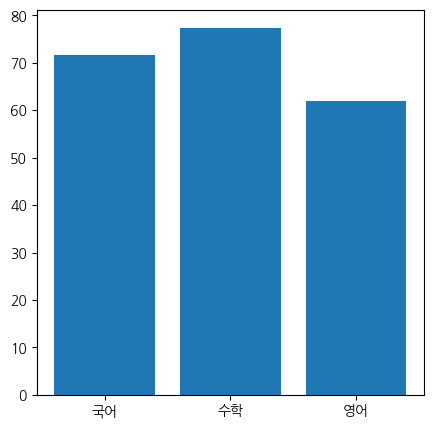

In [176]:
# 1반 학생들의 국어(수학/영어) 성적 평균
score_mean = out_df.mean()

# bar 그래프 그리기
plt.figure(figsize=(5,5))

plt.bar(score_mean.index, score_mean)
plt.show()

In [177]:
# 과목별로 최대 최소값
score_max = out_df.max()
score_min = out_df.min()
print(f'*최대값: \n{score_max}\n')
print(f'*최소값: \n{score_min}')

*최대값: 
국어    100
수학    120
영어    100
dtype: int64

*최소값: 
국어    32
수학    24
영어    21
dtype: int64


In [178]:
# 순서대로 -> 사분위값 -> 상위 몇 %
q1 = out_df.quantile(0.25)
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)
print(f'*4분위수 Q1: \n{q1}\n')
print(f'*4분위수 Q2: \n{q2}\n')
print(f'*4분위수 Q3: \n{q3}')

*4분위수 Q1: 
국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64

*4분위수 Q2: 
국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64

*4분위수 Q3: 
국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64


In [180]:
IQR = q3 - q1
IQR

국어    26.50
수학    45.00
영어    51.75
dtype: float64

# **ㅡㅡㅡㅡㅡweather.csv 파일ㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [29]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')

## **2. 데이터 정보 확인**

In [30]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [31]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


In [32]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [33]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [34]:
# '일시' 열을 index로 설정
weather_df = weather_df.set_index('일시')
weather_df.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [36]:
# index 타입을 datetime으로 변경
# pd.to_datetime
weather_df.index = pd.to_datetime(weather_df.index, format='%Y.%m.%d')
weather_df.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3


In [38]:
type(weather_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## **3. 데이터 전처리 - 결측치**

In [39]:
# 결측치 컬러별 갯수 확인
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [42]:
# boolean 값 -> Boolean indexing 가능
# 최저기온의 어느 날짜가 비어있는지
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [43]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [44]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [45]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [46]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [47]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [ ]:
'''
결측치 확인
- 나머지: 12월 8일 ~ 13일
- 평균 풍속: 12월 7일 ~ 14일
'''

**<h3>▶ 결측값 위치 확인 - 날짜</h3>**

In [48]:
# 날짜 -> 12월 -> 결측
weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


**<h3>▶ 결측값 처리하기</h3>**

In [49]:
# 시간 흐름에 따른 데이터 -> 시계열
# 비어있는 값 앞 뒤로 데이터 경향을 파악
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# '일강수량'의 결측치를 0으로 채워주기
# fillna(숫자)
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
# weather_df['일강수량(mm)'].isna().sum()
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

Series([], Name: 일강수량(mm), dtype: float64)

In [64]:
# 기온 관련 결측치 경향 확인
# '최저기온(°C)', '최고기온(°C)'
weather_df.loc['2010-12-5':'2010-12-15']

# 4분위수 확인
weather_df.loc['2010-12-5':'2010-12-15'].describe()

# 4분위수 활용 : 50% 값(중간값)으로 채우기
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4) # Q2 = 0.4
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9) # Q2 = 2.9
weather_df.loc['2010-12-5':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-10,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-11,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-12,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-13,0.4,2.9,0.0,NaN,NaN,NaN


In [71]:
# '최대 순간 풍속(m/s)'
# 비가 오지 않는 것 같고, 앞뒤로 풍속이 비슷했기에 평균값으로 채워줌
weather_df.loc['2010-12-06':'2010-12-15'].describe()
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)

# '평균 풍속(m/s)'
# 2010-12-04 ~ 2010-12-18 의 평균값으로 채우기
weather_df.loc['2010-12-04':'2010-12-14'].describe()
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.866667)

# '최대 순간 풍속 풍향(hhmi)'
# 2010-12-07 ~ 2010-12-17 의 평균값으로 채우기
weather_df.loc['2010-12-07':'2010-12-17'].describe()
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.380000)

weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,4.866667,340.20
2010-12-08,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-09,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-10,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-11,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-12,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-13,0.4,2.9,0.0,24.1,4.866667,305.38
2010-12-14,-0.8,2.9,0.0,26.7,4.866667,300.80


In [72]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## **4. 데이터 시각화 - subplot, bar**

In [73]:
# 한글 깨짐 현상 방지
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.7 MB/s eta 0:00:00


In [75]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

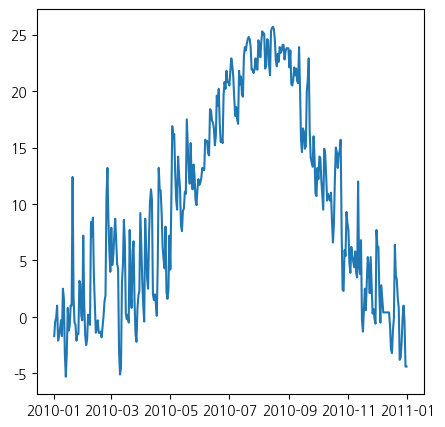

In [78]:
x = weather_df.index    # 시간순서
y1 = weather_df['최저기온(°C)']

# 하나의 셀 안에 어떻게 출력할 것인지
plt.figure(figsize=(5, 5))  # 그래프 사이즈
plt.plot(x, y1)             # 그래프 그리기
plt.show()                  # 그래프 출력

In [ ]:
# 변수 설정
x = weather_df.index    # 시간순서

y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

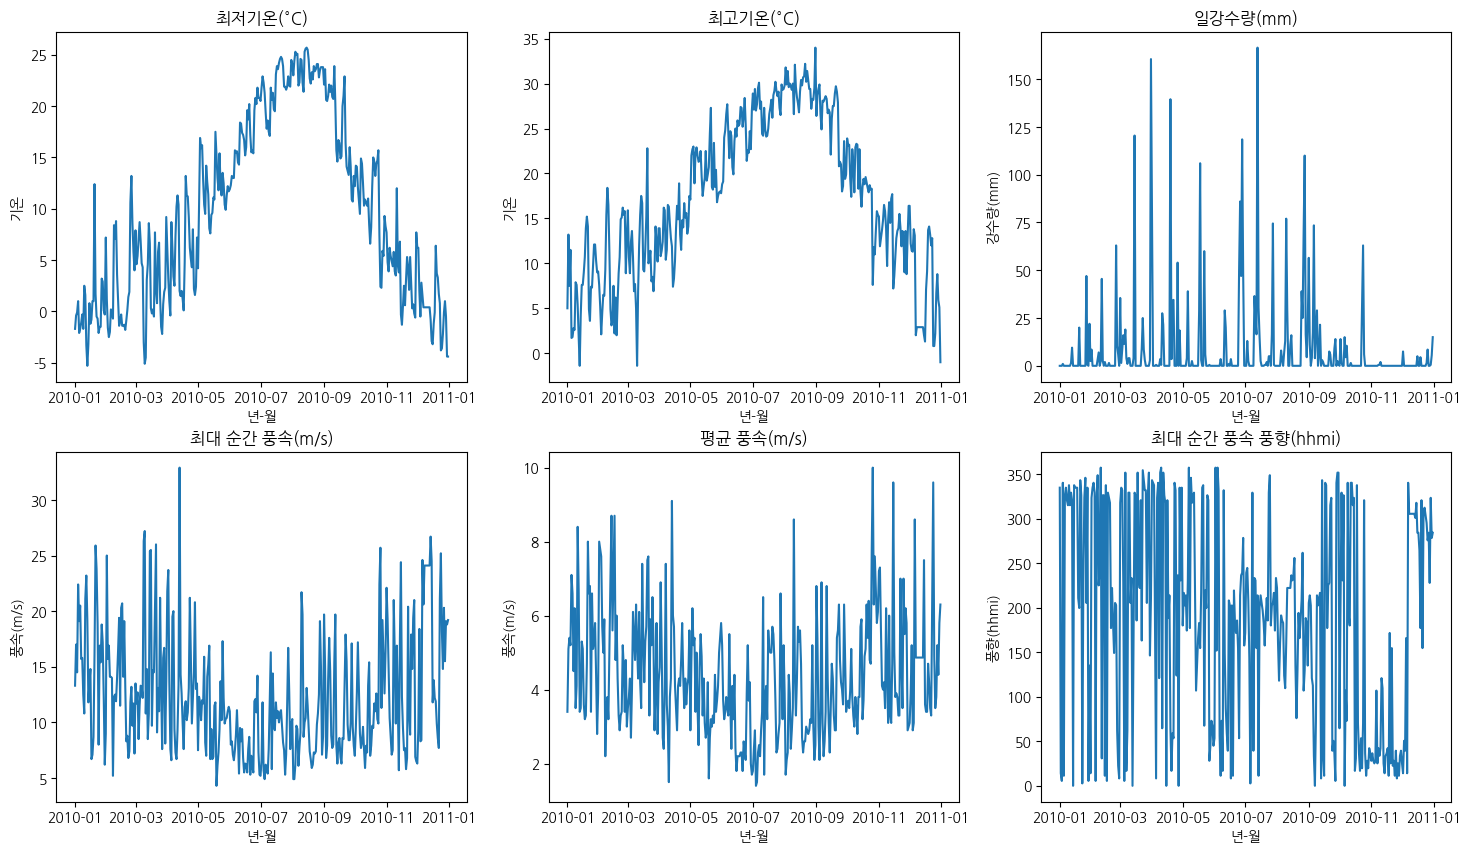

In [86]:
plt.figure(figsize=(18, 10))  # 그래프 사이즈

# plt.subplot(행, 열, 인덱스)
plt.subplot(2, 3, 1)
plt.title('최저기온(°C)')
plt.xlabel('년-월')
plt.ylabel('기온')
plt.plot(x, y1)

plt.subplot(2, 3, 2)
plt.title('최고기온(°C)')
plt.xlabel('년-월')
plt.ylabel('기온')
plt.plot(x, y2)

plt.subplot(2, 3, 3)
plt.title('일강수량(mm)')
plt.xlabel('년-월')
plt.ylabel('강수량(mm)')
plt.plot(x, y3)

plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속(m/s)')
plt.xlabel('년-월')
plt.ylabel('풍속(m/s)')
plt.plot(x, y4)

plt.subplot(2, 3, 5)
plt.title('평균 풍속(m/s)')
plt.xlabel('년-월')
plt.ylabel('풍속(m/s)')
plt.plot(x, y5)

plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.xlabel('년-월')
plt.ylabel('풍향(hhmi)')
plt.plot(x, y6)

plt.show()                  # 그래프 출력

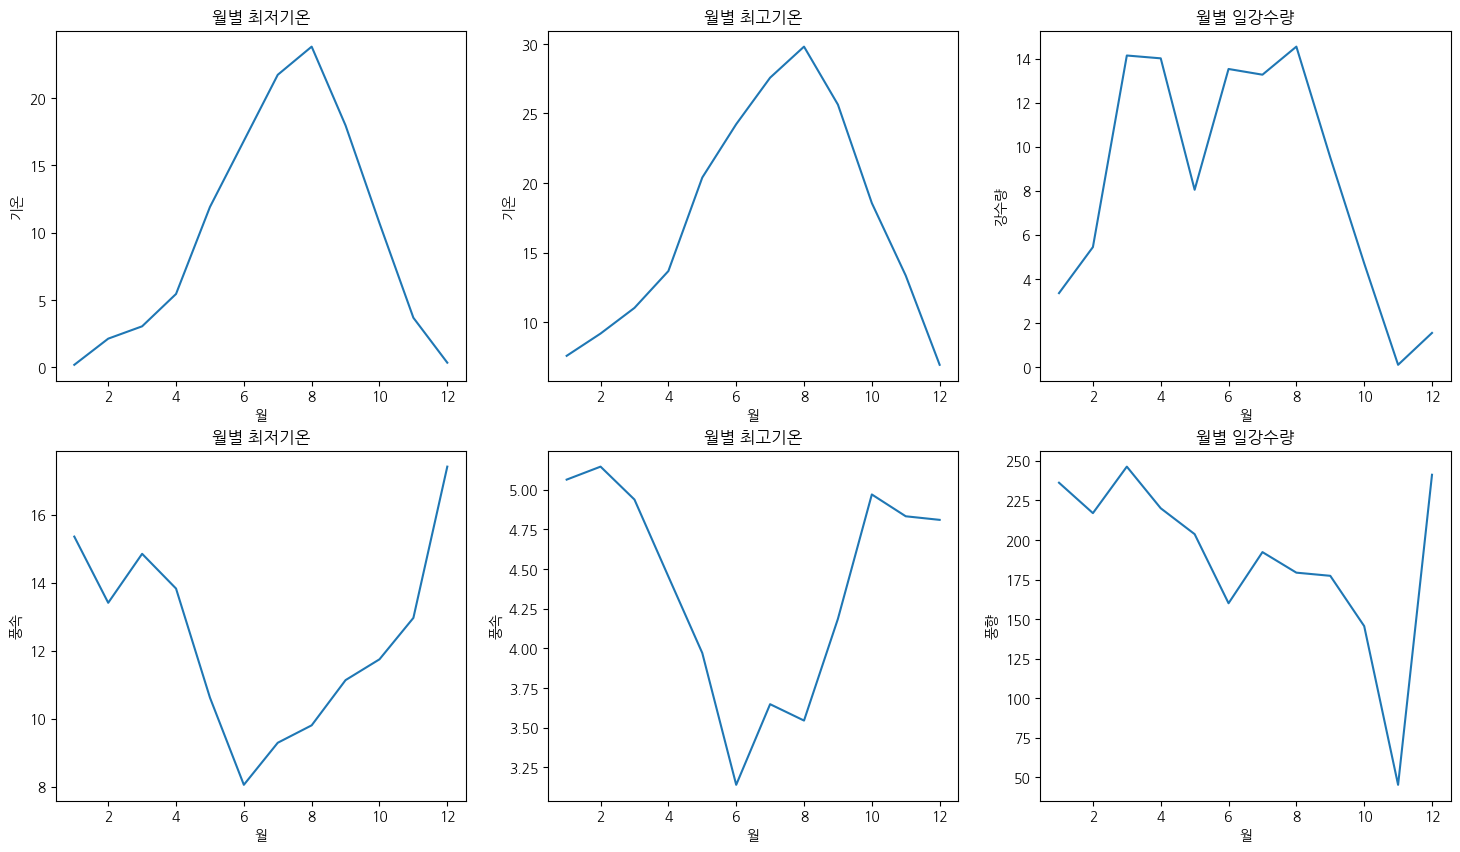

In [126]:
## 월별 데이터
# groupby() : 기준 데이터 -> 수치 데이터

# 기준 데이터 만들기 : 월 데이터 추가
weather_date = pd.Series(weather_df.index)
weather_df['월'] = weather_date.dt.month.values # values를 하지 않으면 인덱스 값이 달라서 같이 제대로 들어가지 않음

# groupby
month_1_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()
month_1_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()
month_1_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()
month_1_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()
month_1_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()
month_1_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

# 그래프 그리기
plt.figure(figsize=(18,10))

x_month = list(weather_df['월'].unique())

plt.subplot(2, 3, 1)
plt.title('월별 최저기온')
plt.xlabel('월')
plt.ylabel('기온')
plt.plot(x_month, month_1_low_temp)

plt.subplot(2, 3, 2)
plt.title('월별 최고기온')
plt.xlabel('월')
plt.ylabel('기온')
plt.plot(x_month, month_1_high_temp)

plt.subplot(2, 3, 3)
plt.title('월별 일강수량')
plt.xlabel('월')
plt.ylabel('강수량')
plt.plot(x_month, month_1_daily_vol)

plt.subplot(2, 3, 4)
plt.title('월별 최대 순간 풍속')
plt.xlabel('월')
plt.ylabel('풍속')
plt.plot(x_month, month_1_wind_speed)

plt.subplot(2, 3, 5)
plt.title('월별 평균 풍속')
plt.xlabel('월')
plt.ylabel('풍속')
plt.plot(x_month, month_1_wind_mean)

plt.subplot(2, 3, 6)
plt.title('월별 최대 순간 풍속 풍향')
plt.xlabel('월')
plt.ylabel('풍향')
plt.plot(x_month, month_1_wind_dic)

plt.show()

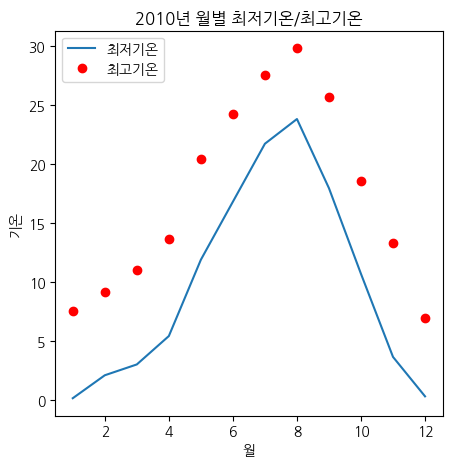

In [140]:
# 기온 그래프를 하나의 그래프로 표시
plt.figure(figsize=(5,5))

plt.title('2010년 월별 최저기온/최고기온')
plt.xlabel("월")
plt.ylabel("기온")

plt.plot(x_month, month_1_low_temp, label = '최저기온')
plt.plot(x_month, month_1_high_temp, 'or', label = '최고기온')
plt.legend(loc='upper left')
# 색상: b blue, r red, y yellow, w white ....
# 선: -- dash line, -. dash dot, : dot
# 범례 위치: upper left, upper center, center(left, right), lower(left, right)

plt.show()

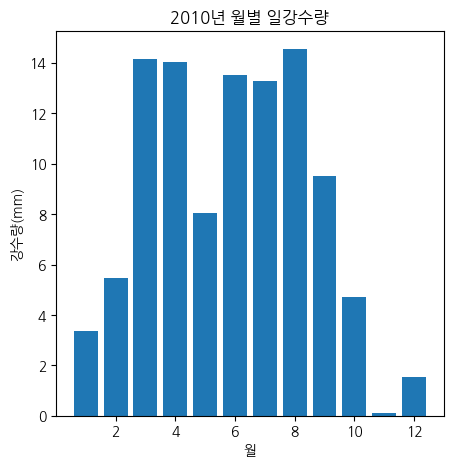

In [141]:
# 일강수량을 바 그래프로 나타내기 (데이터 타입에 따라 적절한 그래프 선택하기)
plt.figure(figsize=(5,5))

plt.title('2010년 월별 일강수량')
plt.xlabel('월')
plt.ylabel('강수량(mm)')
plt.bar(x_month, month_1_daily_vol)

plt.show()

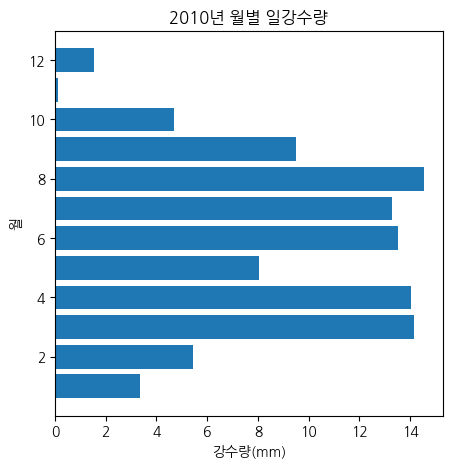

In [143]:
plt.figure(figsize=(5,5))

plt.title('2010년 월별 일강수량')
plt.xlabel('강수량(mm)')
plt.ylabel('월')
plt.barh(x_month, month_1_daily_vol)

plt.show()

In [ ]:
# 인덱스 -> 월 -> 1 -> 1월 데이터만 뽑아온다 -> 31개의 데이터 (0~31) 1~31일

# 인덱스 1월 해당 (조건) -> 일별 날짜 : OK

# groupby: 기준 -> 범위를 나눠서 수치를 분석
# 1월 데이터 -> groupby (x)

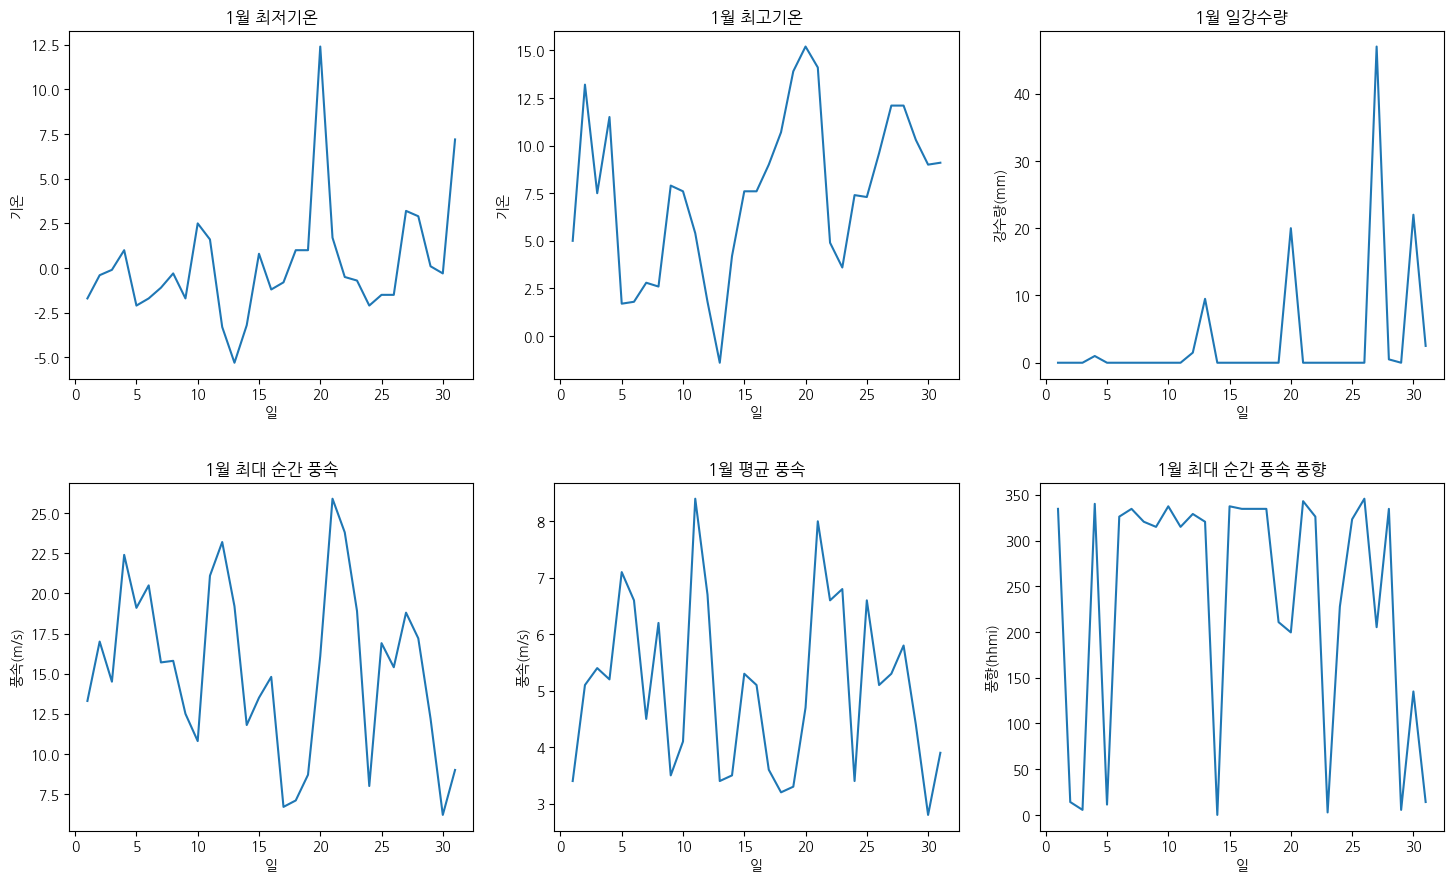

In [155]:
## 1월 데이터
month_1 = weather_df[weather_df['월']==1]

# subplot 이용해서 2x3 으로 그리기
plt.figure(figsize=(10,10))

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.5, top=0.9, wspace=0.2, hspace=0.3)

weather_date = pd.Series(weather_df[weather_df['월']==1].index)
x_day = weather_date.dt.day.values

plt.subplot(2, 3, 1)
plt.title('1월 최저기온')
plt.xlabel('일')
plt.ylabel('기온')
plt.plot(x_day, month_1['최저기온(°C)'])
				
plt.subplot(2, 3, 2)
plt.title('1월 최고기온')
plt.xlabel('일')
plt.ylabel('기온')
plt.plot(x_day, month_1['최고기온(°C)'])

plt.subplot(2, 3, 3)
plt.title('1월 일강수량')
plt.xlabel('일')
plt.ylabel('강수량(mm)')
plt.plot(x_day, month_1['일강수량(mm)'])

plt.subplot(2, 3, 4)
plt.title('1월 최대 순간 풍속')
plt.xlabel('일')
plt.ylabel('풍속(m/s)')
plt.plot(x_day, month_1['최대 순간 풍속(m/s)'])

plt.subplot(2, 3, 5)
plt.title('1월 평균 풍속')
plt.xlabel('일')
plt.ylabel('풍속(m/s)')
plt.plot(x_day, month_1['평균 풍속(m/s)'])

plt.subplot(2, 3, 6)
plt.title('1월 최대 순간 풍속 풍향')
plt.xlabel('일')
plt.ylabel('풍향(hhmi)')
plt.plot(x_day, month_1['최대 순간 풍속 풍향(hhmi)'])

plt.show()

# **ㅡㅡㅡㅡㅡ제주도 음식점ㅡㅡㅡㅡㅡ**

## **1. 데이터 가져오기(모듈 세팅)**

In [190]:
food = pd.read_excel('jeju_food.xlsx')

## **2. 데이터 정보 확인**

In [191]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [192]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


In [193]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [196]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [197]:
food.isna().sum()   # 결측치 확인

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

## **3. 데이터 전처리**

In [200]:
# '광역시/도' 열 삭제
food = food.drop('광역시/도', axis=1)
food.head()

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [202]:
# '중분류 카테고리' 열 삭제
food['중분류 카테고리'].unique()    # 전부 '음식' 밖에 없음

food = food.drop('중분류 카테고리', axis=1)
food.head()

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219


In [206]:
# index 재설정
food = food.set_index('순위')
food.head()

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219


In [215]:
food['시/군/구'].unique()
food['시/군/구'].value_counts() # 인기 많은(검색이 많이 된) 식당은 제주시가 서귀포시 보다 더 많다.

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [214]:
food['소분류 카테고리'].unique()
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [216]:
# 소분류 카테고리=한식
# 한식 1~10위 뽑기 : head, slicing, loc(어려움), iloc
food[food['소분류 카테고리'] == '한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [220]:
# 소분류 카테고리=카페/찻집
cafe = food[food['소분류 카테고리'] == '카페/찻집']

In [226]:
# .str.contains('keyword') -> boolean -> boolean indexing
# 제주도 내 스타벅스의 순위를 찾아보세요.
cafe[cafe['관광지명'].str.contains('스타벅스')].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [238]:
# 한식 -> 국수
kr = food[food['소분류 카테고리']=='한식']
print(kr[kr['관광지명'].str.contains('국수')].count())
kr[kr['관광지명'].str.contains('국수')].head(10)

관광지명        27
시/군/구       27
도로명주소       27
소분류 카테고리    27
검색건수        27
dtype: int64


,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


## **4. 데이터 시각화 - pie**

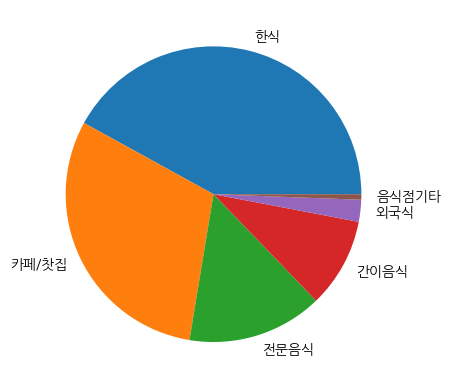

In [252]:
# pie 그래프
# plt.pie(비율, 레이블)

pie = food['소분류 카테고리'].value_counts()

plt.pie(pie, labels=pie.index)
plt.show()

In [253]:
[i/pie.sum() for i in pie]

[0.42, 0.304, 0.148, 0.098, 0.024, 0.006]